<a href="https://colab.research.google.com/github/frsalems/Estadistica/blob/main/Ecuaciones_diferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando los modulos necesarios

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

Para desplegar adecuadamente los resultados

In [ ]:
sympy.init_printing()

### Ecuaciones diferenciales ordinarias

$\frac{dy(x)}{dx}=f(x,y(x))$

la incognita es $y(x)$ y $f(x,y(x))$ es conocida 

solo la primera derivada de orden uno de $y $ es una ECDIF de orden uno, mas generalmente podemos escribir una ECDIF de orden $n$ como

$$
\frac{d^ny}{dx^n}=f(x,y,\frac{dy}{dx},\cdots,\frac{d^{n-1}y}{dx^{n-1}})
$$

 o de Manera implicita 
 $$
 F(x,y,\frac{dy}{dx},\cdots,\frac{d^ny}{dx^n})=0
 $$

 

#### Ejemplo $\frac{dT(t)}{dt}=-k(T(t)-T_a)$ que describe la temperatura en un medio ambiente con temperatura $T_a$, la solución a esta ECDIF es $T(t)=T_a+(T_0-T_a)e^{-kt}$

### Ejemplo2 
La 2da ley de Newton $F=ma$,o mas explicitamente
$$
F(x(t))=m\frac{d^2x(t)}{dt^2}
$$

Para especificar completa mente la solución debemos aparte de dar la solución general , proporcionar la posición inicial y velocidad del objeto,
De manera semejante la solución general de la  ECDIF de orden $n$ tiene $n$ parámetros libres que debemos especificar , por ejemplo las condiciones iniciales para la funcion desconocida y las $n-1$ de sus derivadas 

Una ECDIF siempre se puede escribir como un sistema de $n$  ECDIF's de orden 1

Por ejemplo $$
\frac{d^ny}{dx^n}=f(x,y,\frac{dy}{dx},\cdots,\frac{d^{n-1}y}{dx^{n-1}})
$$
se puede escribir introduciendo $n$ nuevas funciones 

$$
y_1=y,y_2=\frac{dy}{dx},\cdots,y_n=\frac{d^{n-1}y}{dx^{n-1}}
$$

Obtenemos 
$$
\frac{d}{dx}
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_{n-1}\\
y_n
\end{bmatrix}
=
\begin{bmatrix}
y_2\\
y_3\\
\vdots\\
y_n\\
g(x,y_1,\cdots,y_n)
\end{bmatrix}
$$


##### se puede escribir de forma reducida:
$$
\frac{d}{dx}\hat{y}(x)=f(x,\hat{y}(x))
$$

El segundo ejemplo sobre la ley de Newton $F(x)=m\frac{d^2x}{dt^2}$ se puede escribir usando $y=[y_1=x,y_2=\frac{dx}{dt}]^{T}$ de donde obtenemos 

$$
\frac{d}{dt}
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
=
\begin{bmatrix}
y_2\\
\frac{F(y_1)}{m}
\end{bmatrix}
$$


Si las funciones $f_1,f_2,\cdots,f_n$ son lineales la ECDIF se puede escribir como

$$
\frac{dy(x)}{dx}=A(x)y(x)+
r(x)
$$

domde $A(x)$ es una matriz $n\times n$ y $r(x)$ es un vector que depende de $x$

#### Solución simbolica de ECDIF
usaremos la función de sympy dsolve
$\frac{dT(t)}{dx}=-k(T(t)-T_a)$

con condición inicial $T(0)=T_0$

In [ ]:
t,k,T0,Ta=sympy.symbols("t,k,T_0,T_a")
T=sympy.Function("T")

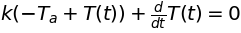

In [ ]:
ode=T(t).diff(t)+k*(T(t)-Ta)
#sympy.Eq(ode)
sympy.Eq(ode,0)

In [ ]:
ode_sol=sympy.dsolve(ode)
ode_sol

Para esta ode sympy.dsolve encuentra su solución general que incluye una constante general $C_1$.

sympy.dsolve es una instancia de sympy.eq que es una representación simbolica de igualdad . Tiene los atributos lhs y rhs para acceder a el lado izquierdo y el lado derecho respectivamente 


In [ ]:
ode_sol.lhs

In [ ]:
ode_sol.rhs

Una vez que se ha encontrado la solución general necesitamos utilizar las condiciones iniciales $T(0)=T_0$ para esto creamoms un diccionario que describa las condiciones iniciales ics={T(0):T0} para usar el método subs para aplicar las condiciones iniciales a la ode. Esto resulta en una ecuación para la constante desconocida 

In [ ]:
ics={T(0):T0}
ics

In [ ]:
C_eq=ode_sol.subs(t,0).subs(ics)
C_eq

En este ejemplo la solución es fácil de encontrar , en general podemos usar sympy.solve. el resultado es una lista de soluciones. Podemos substitur $C_1$ en la solución general para obtener una solución particular que corresponda a las condiciones iniciales ,


In [ ]:
C_sol=sympy.solve(C_eq)
C_sol

In [ ]:
ode_sol.subs(C_sol[0])

In [ ]:
def apply_ics(sol, ics, x, known_params):
 free_params = sol.free_symbols - set(known_params)
 eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n))
.subs(x, 0).subs(ics) for n in range(len(ics))]
 sol_params = sympy.solve(eqs, free_params)
 return sol.subs(sol_params)

Con esta función podemos encontrar una solución particular de una ode que satisfaga las condiciones iniciales , dada la solución general , para el ejemplo anterior 


In [ ]:
ode_sol

In [ ]:
apply_ics(ode_sol,ics,t,[k,Ta])

Este método se puede aplicar a un problema de ODE, aunque no hay garantía de que encuentre solución.
Como ejemplo apliquemos este método a una ODE un poco mas complicada 
$$
\frac{d^2x(t)}{dt^2}+2\gamma\omega_0 \frac{dx(t)}{dt}+\omega_0 ^2x(t)=0
$$

donde $x(t)$ es la posición del oscilador en el tiempo $t$, $\omega_0$ es la frecuencia del caso no amortiguado y $\gamma$ es la tasa de amortiguamiento .
Primero definimos los simbolos que se requieren para construir nuestra ode
 

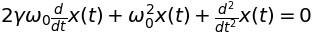

In [ ]:
t,omega0,gamma=sympy.symbols("t,omega_0,gamma",positive=True)
x=sympy.Function("x")
ode=x(t).diff(t,2)+2*gamma*omega0*x(t).diff(t)+omega0**2*x(t)
sympy.Eq(ode,0)

In [ ]:
ode_sol=sympy.dsolve(ode)
ode_sol

In [ ]:
ics={x(0):1,x(t).diff(t).subs(t,0):0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

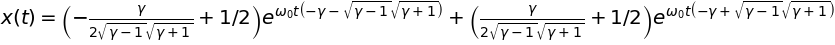

In [ ]:
x_t_sol=apply_ics(ode_sol,ics,t,[omega0,gamma])
x_t_sol

Esta es la solución para el oscilador para valores arbitrarios de $t$ , $\omega_0$ y $\gamma$, donde usamos las condicioes iniciales $x(0)=1$ y $\frac{dx(t)}{dt}|_{t=0}=0$  . Sin embargo si substituimos $\gamma=1$ directamente en esta expresión tendremos una división por $0$ , así para esta elección tenemos que evaluar el límite cuando $\gamma \rightarrow 1$

In [ ]:
x_t_critical=sympy.limit(x_t_sol.rhs,gamma,1)
x_t_critical

Finalmente graficamos las soluciones para $\omega_0=2\pi$ y diferentes valores de $\gamma$

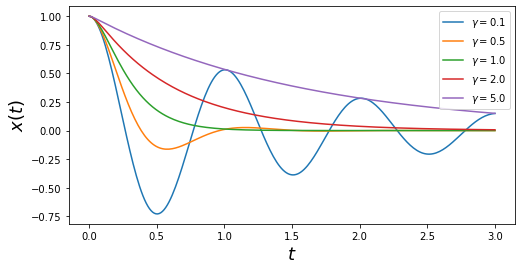

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
      x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
       x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0,
gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()
plt.show()

Los dos ejemplos que hemos visto pueden ser resueltos analiticamente de forma exacta, pero hay muchas ode que no pueden ser resueltas , incluso alguna de orden $1$ por ejemplo
considere 
$$
\frac{dy(x)}{dx}=x+y(x)^2
$$

veamos que pasa cuando tratamos de resolver esta ode con sympy

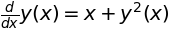

In [ ]:
x=sympy.symbols("x")
y=sympy.Function("y")
f=y(x)**2+x
sympy.Eq(y(x).diff(x),f)

In [ ]:
sympy.dsolve(y(x).diff(x)-f)

Para otras como 
$$
\frac{d^2y(x)}{dx}=x+y(x)^2
$$
no produce ninguna solución


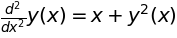

In [ ]:
sympy.Eq(y(x).diff(x,x),f)

In [ ]:
sympy.dsolve(y(x).diff(x,2)-f)

NotImplementedError: ignored

In [ ]:
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax

In [ ]:
x = sympy.symbols("x")
y = sympy.Function("y")



Con esta función podemos construir el campo de direcciones para las ode's $f(x,y(x))=y^2(x)+x,\:f(x,y(x))=\frac{-x}{y(x)},\:f(x,y(x))=\frac{y(x)^2}{x}$ 

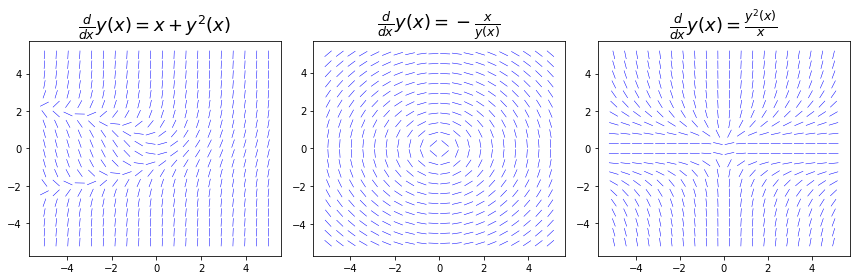

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

fig.tight_layout()
fig.savefig('ch9-direction-field.pdf')

Las lineas de las graficas del campo de direcciones sugieren como son las curvas de las soluciones , por eso el campo de direcciones es una herramienta útil para visulaizar las soluciones de las ode'sque no se pueden resolver analiticamente. un ejemplo de esto es la ode $\frac{dy(x)}{dx}=x+y(x)^2$ con la condición inicial $y(0)=0$.El cual ya se vio que se puede resolver con una aproximación de series de potencias.Como antes resolvemos este problema definiendo el simbolo $x$ y la función $y(x)$    

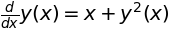

In [ ]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)


Ahora queremos especificar la solución aproximada 
en series de potencia que satisface las condiciones iniciales

In [ ]:
ics={y(0):0} 
ode_sol=sympy.dsolve(y(x).diff(x)-f,ics=ics)
ode_sol

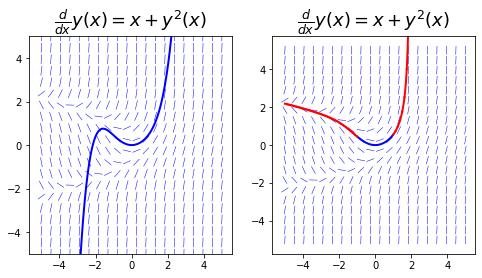

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) 
plot_direction_field(x, y(x), f, ax=axes[0])# left panel
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)
# right panel
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)
 # iteratively resolve the ODE with updated initial conditions
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
# positive x
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())
    (x_vec), 'r', lw=2)
# negative x
for x0 in np.arange(-1, -5, -dx):
  x_vec = np.linspace(x0, x0 - dx, 100)
  ics = {y(x0): ode_sol_m.rhs.removeO().subs(x, x0)}
  ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
  axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())
  (x_vec), 'r', lw=2)

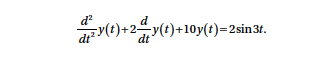

Método De Transformada de  Laplace

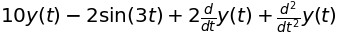

In [ ]:
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)
ode

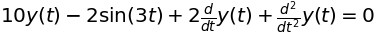

In [ ]:
sympy.Eq(ode,0)

In [ ]:
s, Y = sympy.symbols("s, Y", real=True)


In [ ]:
L_y = sympy.laplace_transform(y(t), t, s)
L_y

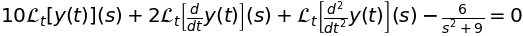

In [ ]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
sympy.Eq(L_ode,0)

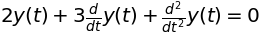

In [ ]:
# Defino la ecuación
edo = y(t).diff(t, t) + 3*y(t).diff(t) + 2*y(t)
sympy.Eq(edo,0)

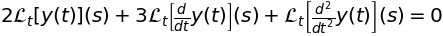

In [ ]:
# Calculo la transformada de Laplace 
L_edo = sympy.laplace_transform(edo, t, s, noconds=True)
sympy.Eq(L_edo,0)

In [ ]:
def laplace_transform_derivatives(e):
    """
    Evalua las transformadas de Laplace de derivadas de funciones sin evaluar.
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args 
            n = len(d.args) - 1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) -
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e) 
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

In [ ]:
# Aplicamos la nueva funcion para evaluar las transformadas de Laplace
# de derivadas
L_edo_2 = laplace_transform_derivatives(L_edo)
sympy.Eq(L_edo_2,0)

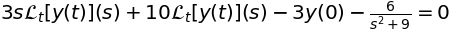

In [ ]:
L_ode_2 = laplace_transform_derivatives(L_ode)
sympy.Eq(L_ode_2,0)

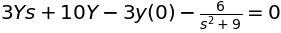

In [ ]:
L_ode_3 = L_ode_2.subs(L_y, Y)
sympy.Eq(L_ode_3,0)

In [ ]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}
ics


⎧         ⎛d       ⎞│      ⎫
⎨y(0): 1, ⎜──(y(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

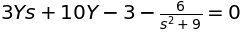

In [ ]:
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4,0)

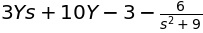

In [ ]:
L_ode_4 = L_ode_3.subs(ics)
L_ode_4

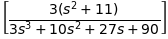

In [ ]:
Y_sol = sympy.solve(L_ode_4, Y)
Y_sol

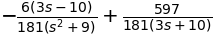

In [ ]:
sympy.apart(Y_sol[0])

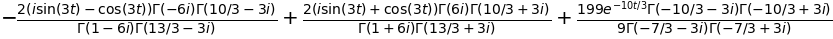

In [ ]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)
sympy.simplify(y_sol)

In [ ]:
y_t = sympy.lambdify(t, y_sol, 'numpy')


TypeError: ignored

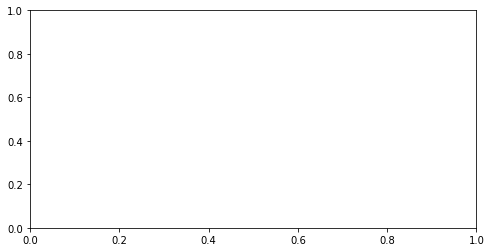

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 10, 500)
ax.plot(tt, y_t(tt))
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y(t)$", fontsize=18)
fig.tight_layout()

### Métodos numéricos para resolver EDO
Si bien algunos problemas de EDO se pueden resolver con métodos analíticos, como hemos visto en los ejemplos de las secciones anteriores, es mucho más común con problemas de ODE que no se puede resolver analíticamente.  En la práctica, los problemas de EDO se resuelven principalmente
con métodos numéricos. Hay muchos enfoques para resolver las EDO numéricamente, y
la mayoría de ellos están diseñados para problemas que se formulan como un sistema de primer orden
EDO's, la forma estandar $\frac{dy}{dx}=f(x,y(x))$ donde $y(x)$ es una función vectorial de $x$ desconocida.
SciPy proporciona funciones para resolver este tipo de problemas, pero antes de explorar cómo usar esas funciones, revisamos brevemente los conceptos fundamentales e
introducimos  la terminología utilizada para la integración numérica de problemas de EDO.
La idea básica de muchos métodos numéricos para EDO se captura en el método de Euler.
Este método se deriva de una expansión en serie de Taylor de $y(x)$ alrededor del punto $x$

$$
y(x+h)=y(x)+\frac{1}{1!}\frac{dy}{dx}h+\frac{1}{2!}\frac{d^2y}{dx^2}h^2+\cdots.
$$
Donde para simplificar la notación, consideramos el caso en el que $y(x)$ es una función escalar.
Al eliminar términos de segundo orden o superiores, obtenemos la ecuación aproximada
$$
y(x + h)\approx y(x)+f(x,y(x))h
$$
, que tiene una precisión de primer orden  para $h$. Esta ecuación se puede convertir en una fórmula de iteración discretizando las variables $x$, $x_0$, $x_1$,$\cdots, x_k,$
eligiendo el tamaño del paso $h_k=x_{k + 1} - x_k$, y denotando $y_k=y (x_k)$. La iteración resultante es la 
fórmula $y_{k + 1} ≈ y_{k} +f(x_k, y_k) h_k$ se conoce como el método de Euler hacia adelante (directo), y se dice que es un
forma explícita porque dado el valor de $y_k$, podemos calcular directamente $y_{k + 1}$ usando la fórmula

El objetivo de la solución numérica de un problema de valor inicial es calcular $y (x)$ en algunos puntos $x_n$, dada la condición inicial $y(x_0)=y_0$. Una fórmula de iteración como la del método de Euler hacia adelante se puede utilizar para calcular valores sucesivos de $y_k$, comenzando desde $y_0$. Hay dos tipos de errores involucrados en este enfoque: Primero, el truncamiento de la serie de Taylor da un error que limita la precisión del método. Segundo, usando
la aproximación de $y_k$ dada por la iteración anterior cuando se calcula $y_{k + 1}$ da un
error adicional que puede acumularse en las iteraciones sucesivas y esto  puede afectar la
estabilidad del método.

Una forma alternativa, que se puede derivar de manera similar, es el Euler hacia atrás

Dado por la fórmula de iteración $y_{k + 1} ≈ y_{k} + f (x_{k + 1}, y_{k + 1}) h_k$. Éste es un ejemplo de un
fórmula de diferenciación hacia atrás,es una fórmula  implícita, porque $y_{k + 1}$ ocurre en ambos
lados de la ecuación. Para calcular $y_{k + 1}$, necesitamos resolver una ecuación algebraica.
 Los métodos implícitos son más complicados de
implementar que los métodos explícitos, y cada iteración requiere más trabajo computacional.
Sin embargo, la ventaja es que los métodos implícitos generalmente tienen una región de estabilidad más grande. y mejor precisión, lo que significa que se puede utilizar un tamaño de paso más grande $h_k$ sin dejar de obtener una solución precisa y estable. Si los métodos explícitos o implícitos son más eficientes
depende del problema particular que se esté resolviendo. Los métodos implícitos son a menudo
particularmente útiles para problemas rígidos, que en términos generales son problemas de EDO que
describen  dinámicas con múltiples escalas de tiempo dispares (por ejemplo, dinámicas que incluyen tanto
oscilaciones rápidas y lentas).

Hay varios métodos para mejorar el método de Euler hacia adelante y hacia atrás de primer orden. Una estrategia es mantener términos de orden superior en la serie de expansión Taylor de $y (x + h)$, que da fórmulas de iteración de orden superior que pueden tener mejor precisión, como el método de segundo orden
$$
y_{k+1}\approx y(x_k)+f(x_{k+1},y(x_{k+1}))h_k+\frac{1}{2}y^{''}(x_k)h_k^2
$$

Sin embargo, estos  métodos requieren evaluar derivadas de orden superior de $y (x)$, que puediera
Ser un problema si $f (x, y (x))$ no se conoce de antemano ( no se da en forma simbólica).
Las formas de solucionar este problema incluyen la aproximación de las derivadas de orden superior utilizando
Aproximaciones en diferencias finitas de las derivadas o muestreo de la función $f (x, y (x))$
en puntos intermedios del intervalo $[x_k, x_{k + 1}]$. Un ejemplo de este tipo de método es el
conocido método de Runge-Kutta, que es un método de un solo paso que utiliza algunas 
evaluaciones de $f (x, y (x))$. El método de Runge-Kutta más conocido es el de cuarto orden cuyo .
esquema esta dado por:

$$
y_{k+1}=y_k+\frac{1}{6}(k_1+2k_2+2k_3+k_4)
$$
donde 
$$k_1=f(x_k,y_k)h_k$$



$$
k_2=f(x_k+\frac{h_k}{2},y_k+\frac{k_1}{2})h_k\\
$$


$$
k_3=f(x_k+\frac{h_k}{2},y_k+\frac{k_2}{2})h_k\\
$$


$$
k_4=f(x_k+h_k,y_k+k_3)h_k\\
$$



Aquí, $k_1,k_2,k_3 , k_4$ son cuatro evaluaciones diferentes de la función EDO f (x, y (x)) que se utilizan en la fórmula explícita para $y_{k + 1}$ dada en el texto anterior. La estimación resultante de $y_{k + 1}$ tiene una
precision  de cuarto orden, con un error de quinto orden. se pueden obtener esquemas de orden superior  usando más
 evaluaciones de función $f$. 
 Combinando dos métodos de diferentes es posible obtener una mejor aproximación  del error en la aproximación. Una famosa
combinación son los esquemas de cuarto y quinto orden de Runge-Kutta, lo que da como resultado una método exacto de cuarto orden para  las estimaciones del error. Se conoce como RK45 o Runge-
Método de Kutta-Fehlberg. El método Dormand-Prince es otro ejemplo de un método orden superior, que además utiliza control de tamaño de pasos adaptativo. Otro ejemplo es el  el 8-5-3 este  método combina esquemas de tercer y quinto orden para producir un método de octavo orden.
las implementaciones de estos métodos están disponibles en SciPy.
Un método alternativo es usar más de un valor previo de $y_k$ para calcular $y_{k + 1}$.
Dichos métodos se conocen como métodos de varios pasos y, en general, se pueden escribir en la forma:

$$
y_{k+s}=\sum_{n=0}^{s-1}a_ny_{k+n}+h\sum_{n=0}^sb_nf(x_{k+n},y_{k+n})
$$


Con esta fórmula, para calcular $y_{k + s}$, se utilizan los valores previos  de $s$  , $y_k $,y $f (x_k, y_k)$
(conocido como método de  $s$ pasos ). Las elecciones de los coeficientes $a_n$ y $b_n$ dan lugar a diferentes métodos de varios pasos. Tenga en cuenta que si las  $b_s = 0$, entonces el método es explícito, y si $b_s ≠ 0$,
es implícito.
Por ejemplo, $b_0 = b_1 =… = b_{s - 1} = 0$ da la fórmula general para un BDF de paso $s$
fórmula, donde $a_n$ y $b_n$ se eligen para maximizar el orden de precisión aquí se pide
que el método es exacto para polinomios hasta el orden más alto posible. Esto da una
sistema de ecuaciones que se puede resolver para los coeficientes desconocidos $a_n$ y $b_n$. Por ejemplo

Por ejemplo el método BDF de un paso con $b_1 = a_0 = 1$ se reduce al método de Euler hacia atrás, 
$$y_{k + 1} =
y_k + hf (x_{k + 1}, y_{k + 1})$$,

 y el método BDF de dos pasos, $$y_{k + 2} = a_0y_k + a_1y_{k + 1} + hb_2f (x_{k + 2}, y_{k + 2})$$, 
 resolviendo para los coeficientes ($a_0$, $a_1$ y $b_2$), obtenemos :
 
  $$y_{k+2}=-\frac{1}{3}y_k+\frac{4}{3}y_{k+1}+\frac{2}{3}$$

También se pueden construir métodos BDF de orden superior. SciPy proporciona un solucionador de BDF que se recomienda para problemas de rigidez,  por sus buenas propiedades de estabilidad.
Otra familia de métodos de varios pasos son los métodos de Adams, que se obtienen de la elección $a_0 = a_1 =\cdots=a_{s-2} =0 $ y $a_{s-1}=1$, donde de nuevo el resto donde de nuevo el resto de los 
 coeficientes desconocidos se seleccionan de tal modo que maximizan  el orden de exactitud del método. Específicamente,
los métodos explícitos con bs = 0 se conocen como métodos Adams-Bashforth, y el
Los métodos implícitos con bs ≠ 0 se conocen como métodos de Adams-Moulton. Por ejemplo, Los métodos Adams-Bashforth y Adams-Moulton de un paso reducen a los 
métodos de Euler hacia adelante y hacia atrás, respectivamente, y los métodos de dos pasos son:

$$
y_{k+2}=y_{k+1}+h(-\frac{1}{2}f(x_k,y_k)+\frac{3}{2}f(x_{k+1},y_{k+1}))
$$

y

$$
y_{k+1}=y_{k}+\frac{1}{2}h(f(x_k,y_k)+f(x_{k+1},y_{k+1}))
$$

respectivamente 


Los métodos explícitos e implícitos de orden superior también se pueden construir de este modo. SciPy también tiene  solucionadores que utilizan estos métodos de Adams  .

In [ ]:
x=sympy.symbols('x')
y=sympy.Function('y')
f=y(x)**2+x

generando una función utilizando lambdify

In [ ]:
f_np=sympy.lambdify((y(x),x),f)

necesitamos el valor inicial 

In [ ]:
y0=0
xp=np.linspace(0,1.9,100)
yp=integrate.odeint(f_np,y0,xp)
xm=np.linspace(0,-5,100)
ym=integrate.odeint(f_np,y0,xm)

El resultado son dos arreglos de numpy
graficaremos los arrefglos junto con su campo de direcciones 

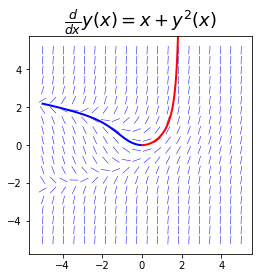

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
plot_direction_field(x,y(x),f,ax=ax)
ax.plot(xm,ym,'b',lw=2)
ax.plot(xp,yp,'r',lw=2)
plt.show()